学籍番号：1123117H
氏名：XU MING
学部：商学部
学年：2年

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import statsmodels.api as sm
import geocoder
from statsmodels.stats.outliers_influence import *

In [2]:
airbnb_raw = pd.read_excel('/Users/lamort/Desktop/2年秋冬/経済学のためのデータ分析/AB_NYC_2019_2.xlsx')
# データの読み込み

In [3]:
airbnb_raw.head()
#　データの確認

,id,name,host_id,host_name,neighbourhood_group,Manhattan_dummry,neighbourhood,latitude,longitude,room_type,private_dummy,home_dummy,shared_dummy,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,0,Kensington,40.64749,-73.97237,Private room,1,0,0,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,1,Midtown,40.75362,-73.98377,Entire home/apt,0,1,0,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,1,Harlem,40.80902,-73.94190,Private room,1,0,0,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,0,Clinton Hill,40.68514,-73.95976,Entire home/apt,0,1,0,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,1,East Harlem,40.79851,-73.94399,Entire home/apt,0,1,0,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb_raw.columns
# 何があるかを確認

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'Manhattan_dummry', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'private_dummy', 'home_dummy', 'shared_dummy', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
airbnb_raw.rename(columns={'Manhattan_dummry':'Manhattan_dummy'}, inplace=True)
# 入力ミスを修正

In [6]:
airbnb_raw.iloc[:,3:].describe()
#　値段がゼロのような異常値を確認、平均、標準偏差、最小値、最大値、四分位数を確認

,Manhattan_dummy,latitude,longitude,private_dummy,home_dummy,shared_dummy,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48366.000000,48366.000000,48366.000000,48366.000000,48366.000000,48366.000000,48366.000000,48366.000000,48366.000000,38425,38425.000000,48366.000000,48366.000000
mean,0.442832,40.728871,-73.952249,0.456312,0.519973,0.023715,152.802299,7.031613,23.226543,2018-10-03 08:26:40.208197632,1.365457,7.190712,112.719865
min,0.000000,40.499790,-74.244420,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,0.000000,40.690000,-73.983078,0.000000,0.000000,0.000000,69.000000,1.000000,1.000000,2018-07-07 00:00:00,0.190000,1.000000,0.000000
50%,0.000000,40.722920,-73.955700,0.000000,1.000000,0.000000,106.500000,3.000000,5.000000,2019-05-19 00:00:00,0.710000,1.000000,45.000000
75%,1.000000,40.763100,-73.936420,1.000000,1.000000,0.000000,175.000000,5.000000,23.000000,2019-06-23 00:00:00,2.000000,2.000000,227.000000
max,1.000000,40.913060,-73.712990,1.000000,1.000000,1.000000,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,0.496726,0.054542,0.046072,0.498093,0.499606,0.152161,240.917007,20.435676,44.512880,NaN,1.671067,33.123095,131.648506


In [7]:
airbnb_raw.nunique()
#　ユニークな値を確認

id                                48366
name                              47376
host_id                           37121
host_name                         11361
neighbourhood_group                   5
Manhattan_dummy                       2
neighbourhood                       221
latitude                          18964
longitude                         14638
room_type                             3
private_dummy                         2
home_dummy                            2
shared_dummy                          2
price                               671
minimum_nights                      108
number_of_reviews                   393
last_review                        1764
reviews_per_month                   930
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
airbnb_raw.describe(include='O')
# カテゴリカルデータの確認

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,48340,48344,48366,48366,48366
unique,47376,11361,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,411,21418,3882,25149


In [9]:
airbnb_raw.isnull().sum()
# 欠損値の確認

id                                   0
name                                26
host_id                              0
host_name                           22
neighbourhood_group                  0
Manhattan_dummy                      0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
private_dummy                        0
home_dummy                           0
shared_dummy                         0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9941
reviews_per_month                 9941
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<font size="3"> 欠損値の確認を行った結果、name、host_name、last_review、およびreviews_per_monthに欠損値が見られた。特に、reviews_per_monthとlast_reviewにおいて欠損値の割合が高く、これらの変数については、今後の分析において適切な処理や考慮が必要であることが示唆される。

In [10]:
airbnb_cleaned = airbnb_raw.drop(['name','id','host_name','last_review'], axis=1, inplace=False)
#　分析に不要な列を削除

In [11]:
airbnb_cleaned.isnull().sum()
# もう一回欠損値を確認

host_id                              0
neighbourhood_group                  0
Manhattan_dummy                      0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
private_dummy                        0
home_dummy                           0
shared_dummy                         0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9941
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

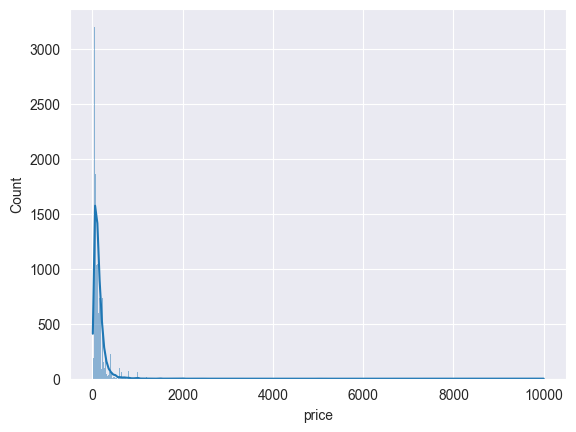

In [12]:
sns.histplot(airbnb_raw.price, kde=True)
# priceの分布を確認

<font size="3"> 価格の外れ値が分布を右側に歪め、分布に大きな影響を及ぼしているため、外れ値の影響を排除して分析対象の範囲を限定して図示する。

<Axes: xlabel='price', ylabel='Count'>

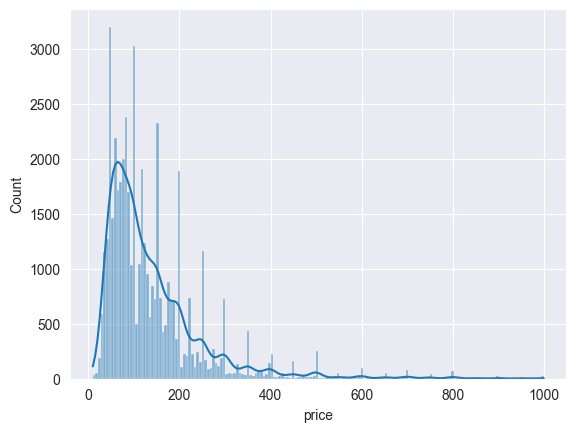

In [13]:
sns.histplot(airbnb_raw[airbnb_raw['price'] < 1000]['price'], kde=True)
# 範囲を限定してpriceの分布を確認

<Axes: >

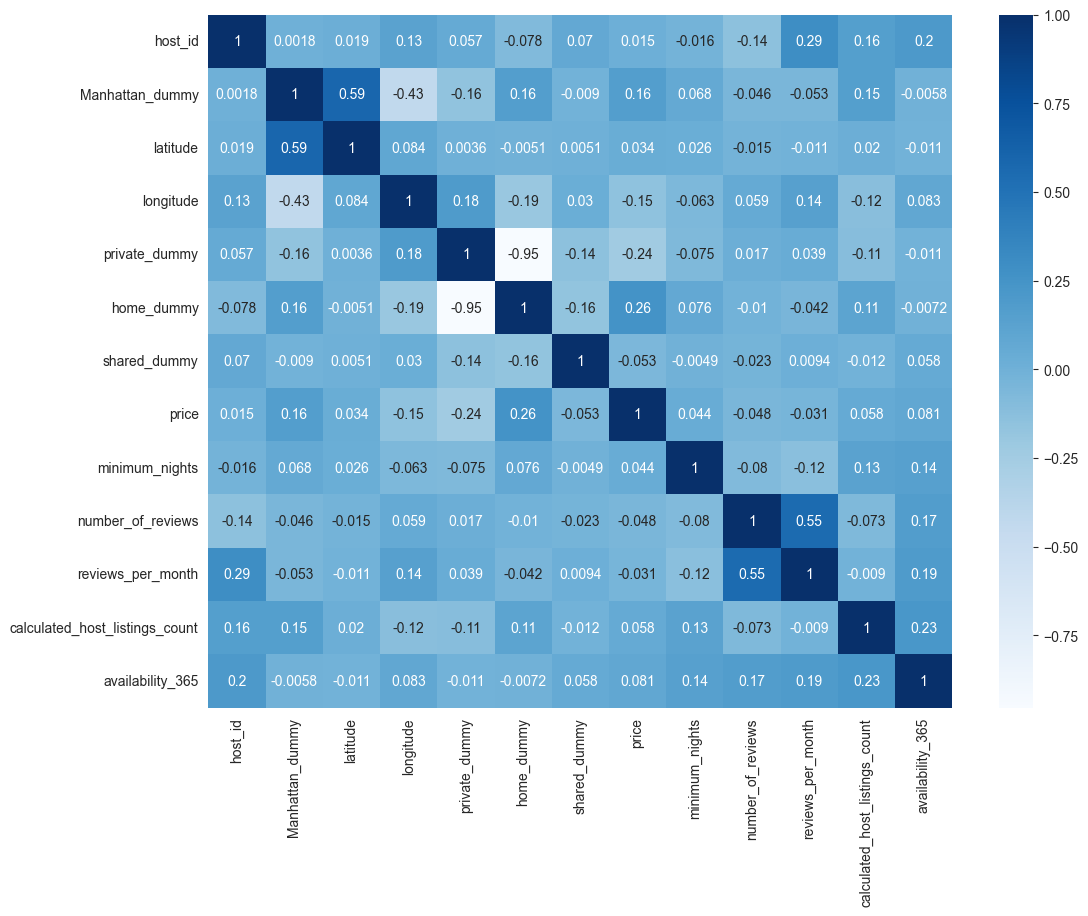

In [14]:
plt.figure(figsize=(12, 9))
sns.heatmap(airbnb_cleaned.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1).corr(), annot=True, cmap='Blues')
#　変数間の相関関係を確認する

<font size="3"> Manhattan_dummyとlongitude、Manhattan_dummyとlatitude、number_of_reviewsとreviews_per_month、home_dummyとprivate_dummyの相関性が高いことから、多重共線性が懸念され、回帰分析を行う際には注意が必要である。一方で、priceはprivate_dummyおよびhome_dummyとの間にのみ低い相関性を示し、他の変数との相関性はさらに低い。このことから、前述の分布図に見られるように、priceの外れ値が他の変数との相関性に大きな影響を与えている可能性が考えられる。さらに、一般的な民宿と超高級民宿では、価格に影響を及ぼす要因が異なり、それに伴う相関関係も異なると推測される。例えば、高級民宿においては、サービスの質や部屋の内装、特に高級設備（例：プライベートプールやスパなど）が価格に大きな影響を及ぼす一方、一般的な民宿では、レビュー数や立地条件などが価格の主要な決定要因となる。このように、異なる宿泊タイプ間で影響を与える要因の違いが存在するため、分析においてはpriceの外れ値を除外し、より一貫性のある分析結果を得ることが求められる。

In [15]:
airbnb_selected_by_price = airbnb_cleaned[airbnb_cleaned['price'] < 1000]
# 外れ値が多いため、priceの範囲を限定する

<Axes: >

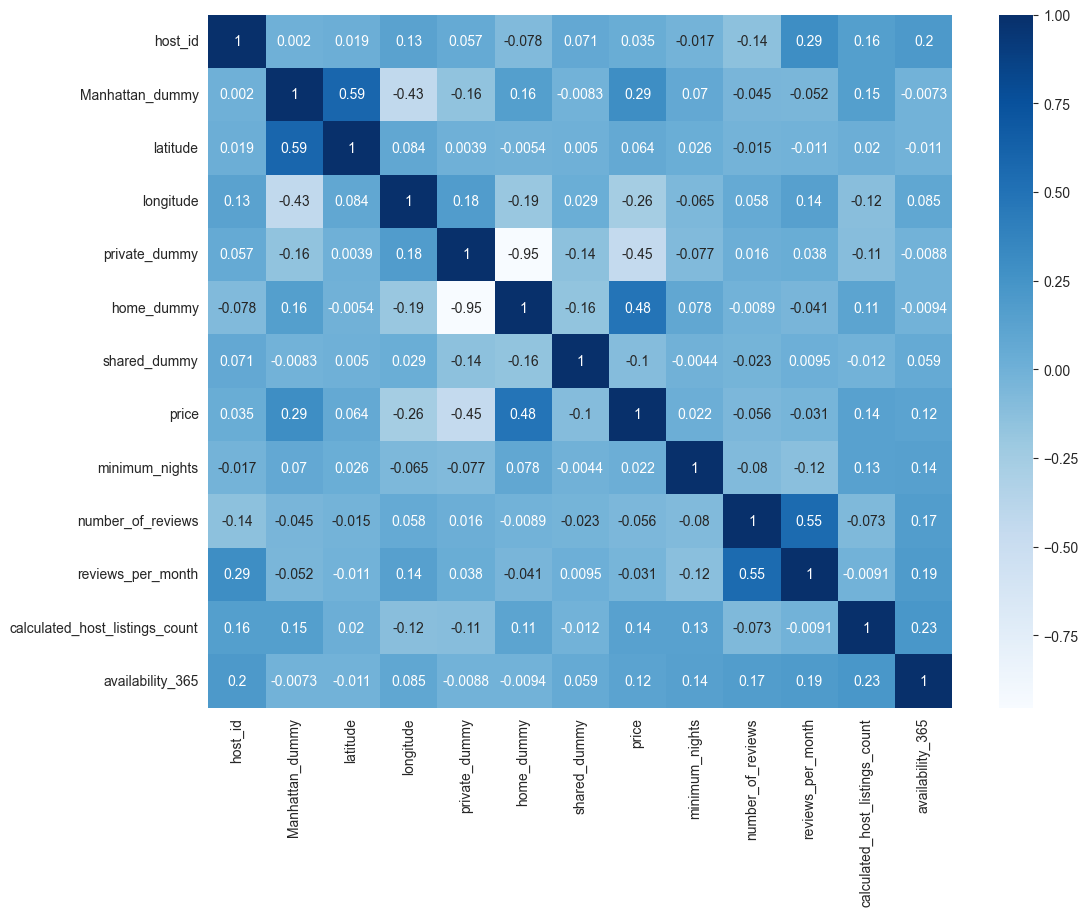

In [16]:
plt.figure(figsize=(12, 9))
sns.heatmap(airbnb_selected_by_price.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1).corr(), annot=True, cmap='Blues')
# priceの範囲を限定して変数間の相関関係を確認する

<font size="3"> priceの範囲を限定することで、price と他の変数との相関関係がより明確に示された。

In [17]:
airbnb_num_only = airbnb_cleaned.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)
# カテゴリカルデータを除外

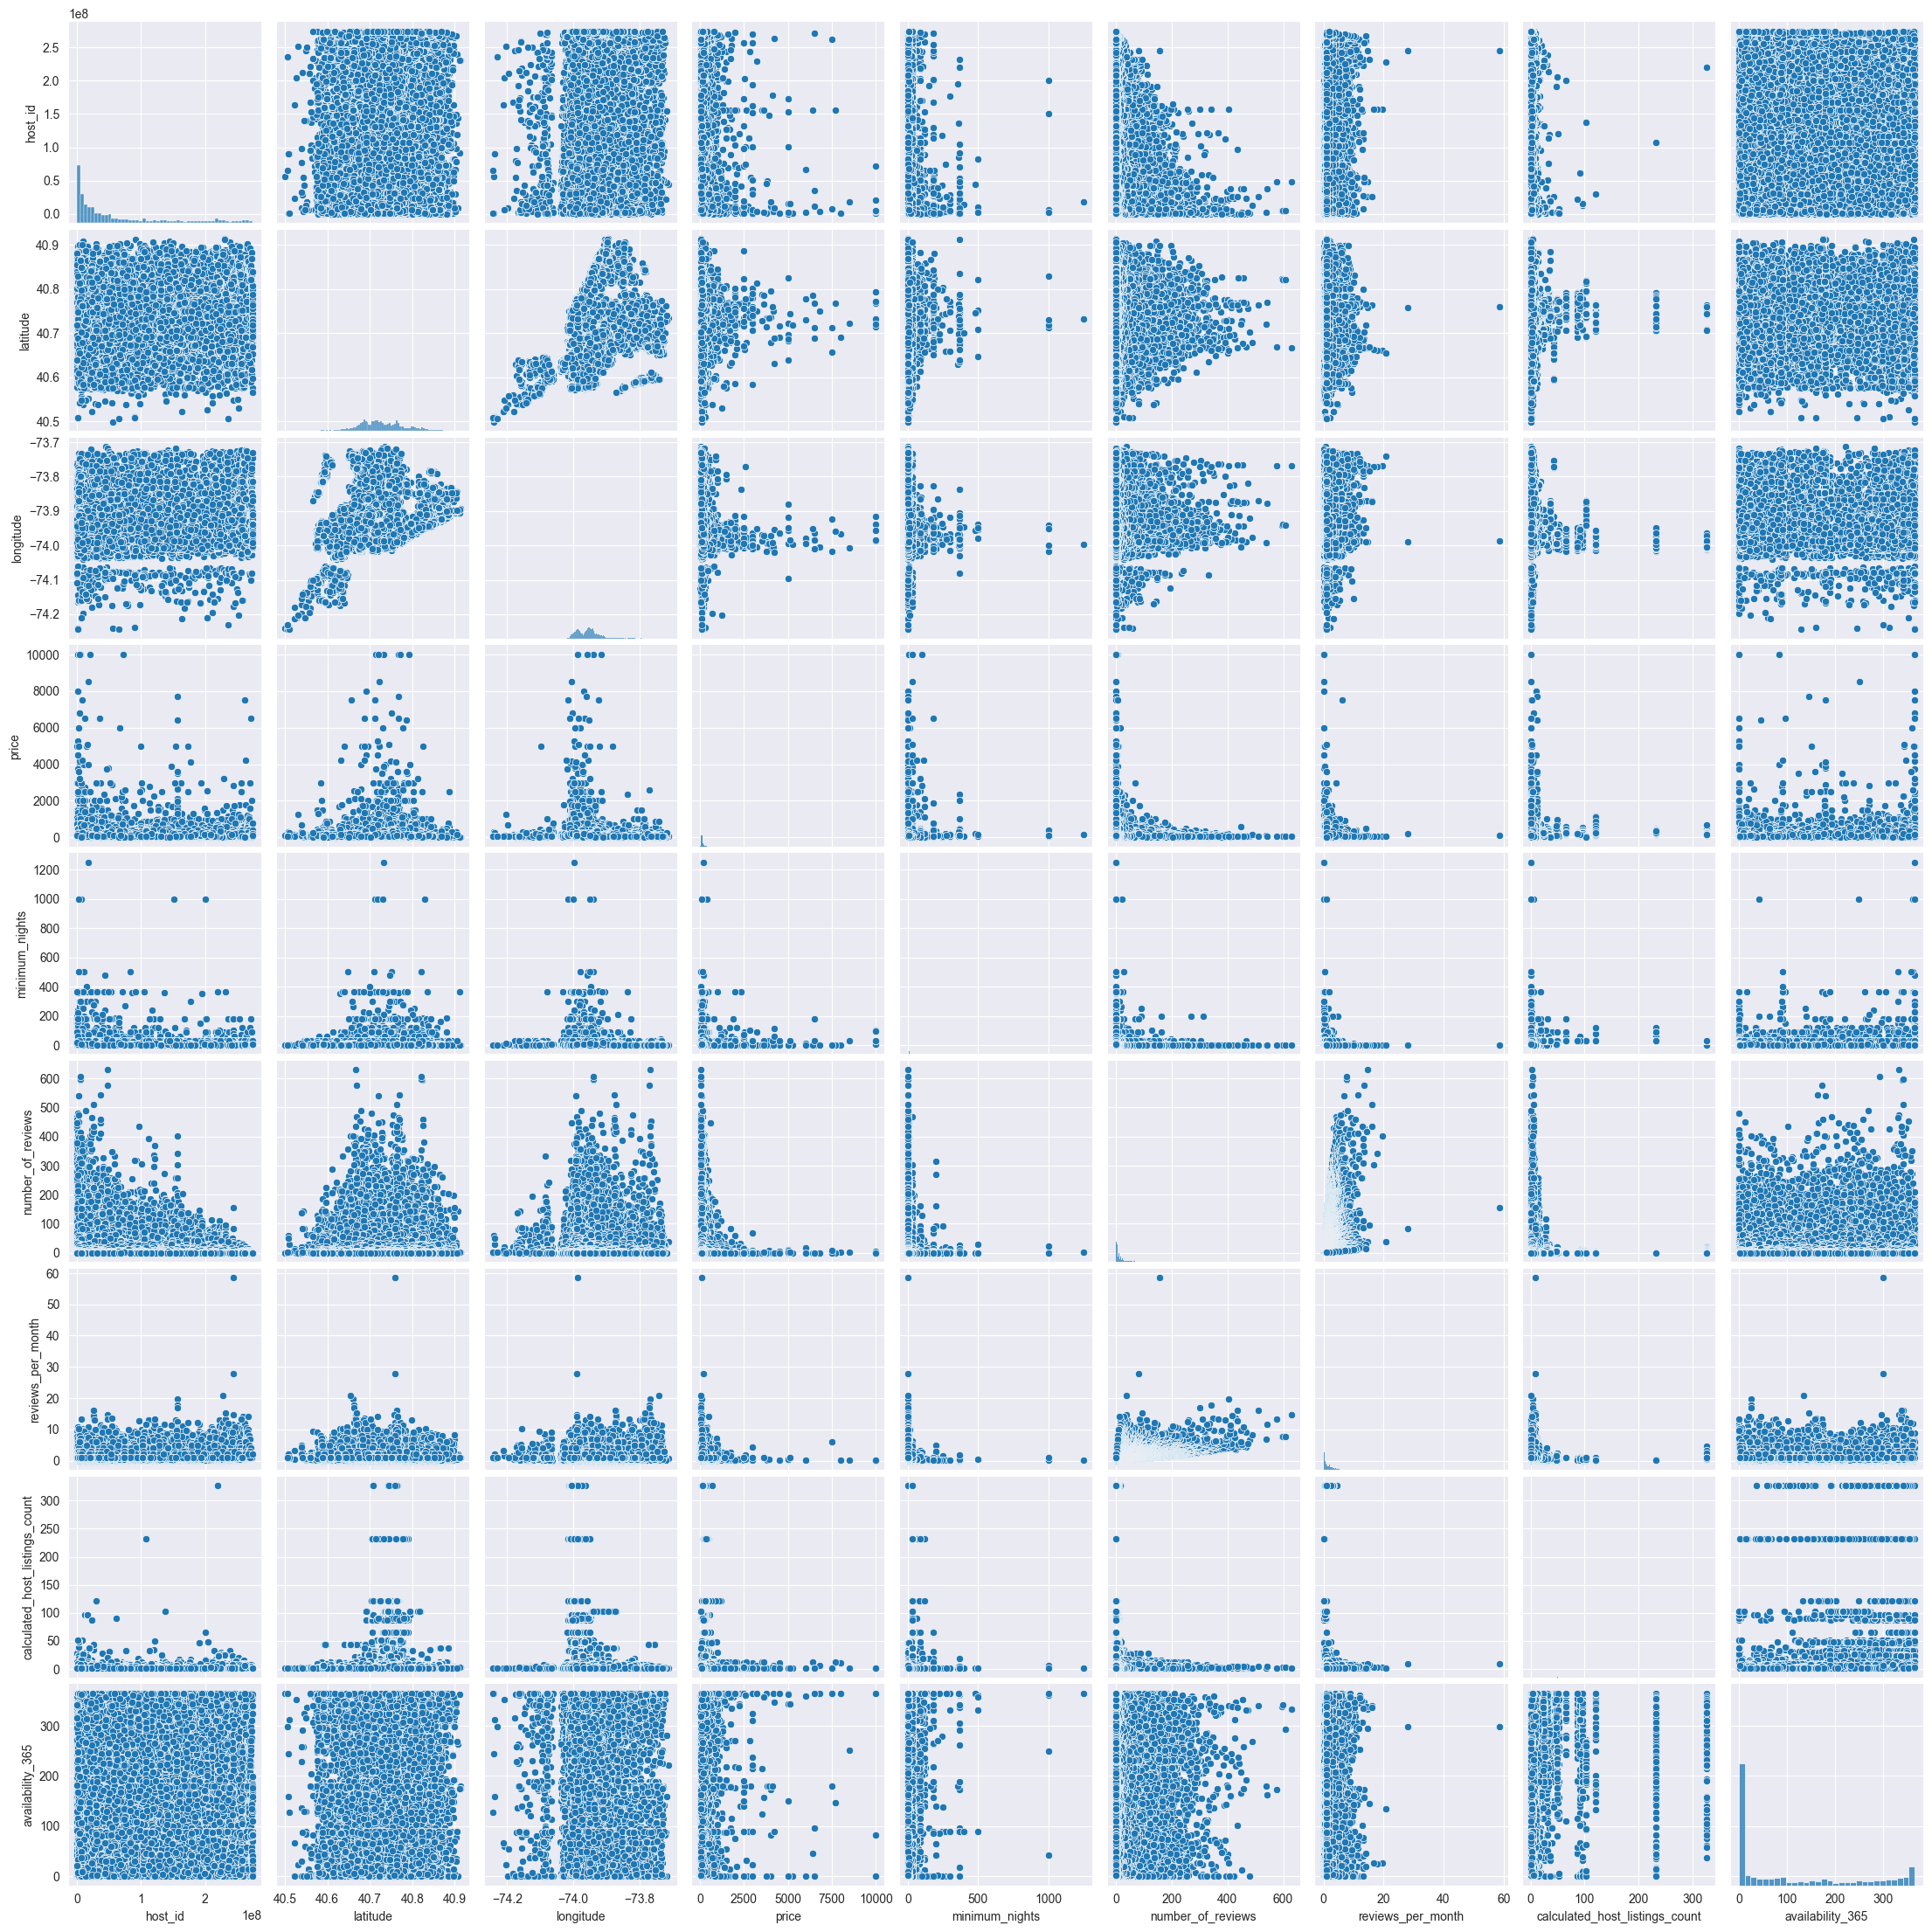

In [18]:
sns.pairplot(airbnb_num_only.drop(airbnb_num_only.filter(like='dummy').columns, axis=1))
# 数値データのペアプロットを作成

In [19]:
position_ = airbnb_raw[['longitude', 'latitude', 'neighbourhood_group']] #　位置情報を取り出して単独に処理する
ave_position = pd.DataFrame(pd.concat([position_.iloc[:, 0:2].mean(), pd.Series('center', index=position_.columns[2:])])).T
# 位置情報の平均値を計算して中心エリアとしてデータフレームを作成

In [20]:
position_ = pd.concat([position_, ave_position], axis=0, ignore_index=True)
# 平均値をデータフレームに追加

In [21]:
ave_position
# 平均値を確認

,longitude,latitude,neighbourhood_group
0,-73.952249,40.728871,center


In [22]:
position_.iloc[-1, :]
# データフレームは正しく追加されたか確認

longitude             -73.952249
latitude               40.728871
neighbourhood_group       center
Name: 48366, dtype: object

<Axes: title={'center': 'Geographical Distribution of Listings by Neighbourhood Group'}, xlabel='longitude', ylabel='latitude'>

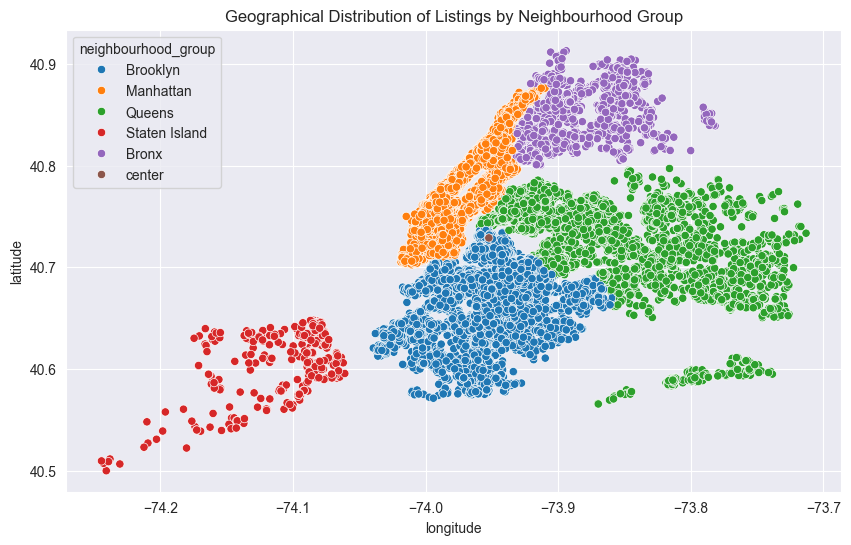

In [23]:
plt.figure(figsize=(10,6))
plt.title('Geographical Distribution of Listings by Neighbourhood Group')

graph_ = sns.scatterplot(x=position_.longitude, y=position_.latitude, hue=position_.neighbourhood_group, palette='tab10')

graph_
# 中心点を図示して、各地域の位置情報を確認する。
# 中心点がマンハッタン、ブルックリン、クイーンズのちょうど真ん中にあることが確認できる。

In [24]:
position_

,longitude,latitude,neighbourhood_group
0,-73.97237,40.64749,Brooklyn
1,-73.98377,40.75362,Manhattan
2,-73.9419,40.80902,Manhattan
3,-73.95976,40.68514,Brooklyn
4,-73.94399,40.79851,Manhattan
...,...,...,...
48362,-73.93317,40.70184,Brooklyn
48363,-73.94867,40.81475,Manhattan
48364,-73.99112,40.75751,Manhattan
48365,-73.98933,40.76404,Manhattan


In [25]:
position_1 = position_.iloc[:-1, :]
position_2 = position_.iloc[-1, :]
#　中心点との距離を算定するために、データフレームを分割

In [26]:
position_1.iloc[-1, :]
# データフレームが正しく分割されたか確認

longitude              -73.98933
latitude                40.76404
neighbourhood_group    Manhattan
Name: 48365, dtype: object

In [27]:
position_2
# データフレームが正しく分割されたか確認

longitude             -73.952249
latitude               40.728871
neighbourhood_group       center
Name: 48366, dtype: object

In [28]:
distance_ = []

for x, y in zip(position_1.latitude, position_1.longitude):
    distance_.append(geodesic((x, y), (position_2[1], position_2[0])).km)

position_1['distance'] = distance_

# 中心点との距離を算定してデータフレームに追加

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_72799/381008220.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance_.append(geodesic((x, y), (position_2[1], position_2[0])).km)
/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_72799/381008220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_1['distance'] = distance_


(array([1.1093e+04, 2.3338e+04, 8.2180e+03, 3.2710e+03, 1.6320e+03,
        6.9000e+02, 8.9000e+01, 2.2000e+01, 6.0000e+00, 7.0000e+00]),
 array([2.88381949e-02, 3.55233824e+00, 7.07583828e+00, 1.05993383e+01,
        1.41228384e+01, 1.76463384e+01, 2.11698385e+01, 2.46933385e+01,
        2.82168385e+01, 3.17403386e+01, 3.52638386e+01]),
 <BarContainer object of 10 artists>)

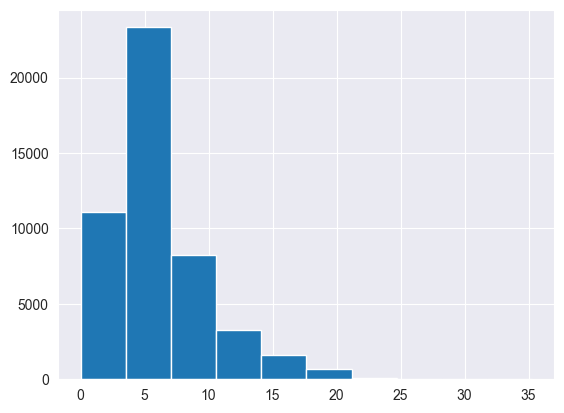

In [29]:
plt.hist(position_1.distance)
# 中心点との距離の分布を確認

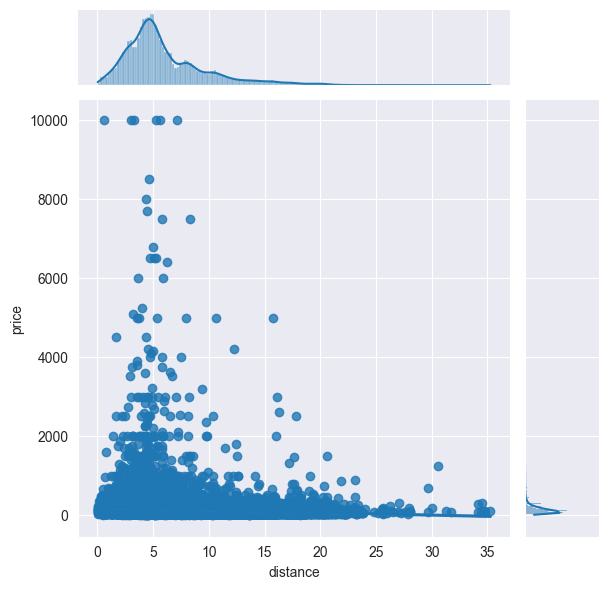

In [30]:
sns.jointplot(x=position_1.distance, y=airbnb_raw.price, kind='reg')
# 中心点との距離とpriceの関係を確認

In [31]:
model1 = sm.OLS(airbnb_cleaned.price, sm.add_constant(position_1.distance)).fit()
print(model1.summary())
# 中心点との距離とpriceの関係を確認

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     484.1
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          9.28e-107
Time:                        11:58:10   Log-Likelihood:            -3.3365e+05
No. Observations:               48366   AIC:                         6.673e+05
Df Residuals:                   48364   BIC:                         6.673e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.3729      2.064     92.705      0.0

<font size="3"> 単回帰分析を用いて、ニューヨークのairbnb物件の価格と中心点からの距離との関係を分析した。結果は、距離と価格の間に0.1パーセント水準で有意な負の相関関係が存在することを示している。具体的には、距離が1単位増加するごとに、価格が平均で6.31ドル減少する。この推定は95%の信頼区間で[-6.87, -5.75]に収まる。また、回帰モデルの決定係数は0.010であり、距離は価格変動の約1%しか説明していない。この結果は、距離が価格に与える影響は限定的であり、物件の設備や交通の利便性、季節性など他の要因が価格に強く影響している可能性が示唆される。

In [32]:
airbnb_price_selected = pd.concat([airbnb_cleaned, position_1.distance], axis=1)
airbnb_price_selected = airbnb_price_selected[airbnb_price_selected['price'] < 1000]

In [33]:
model2 = sm.OLS(airbnb_price_selected.price, sm.add_constant(airbnb_price_selected.distance)).fit()
print(model2.summary())
# 値段を一千ドル以下に限定して、中心点との距離とpriceの関係を確認

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1872.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:58:10   Log-Likelihood:            -2.9448e+05
No. Observations:               48071   AIC:                         5.890e+05
Df Residuals:                   48069   BIC:                         5.890e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.4072      0.956    183.403      0.0

<font size="3"> 値段の範囲を限定して再度単回帰分析を実施したところ、決定係数が大幅に上がり、先の仮説が一定程度正しいと考えられる。

<font size="3"> 先のマップを見てみると、中心点がマンハッタン、ブルックリン、クイーンズのちょうど真ん中にあることがわかる。しかし、実際にはマンハッタンがニューヨーク市の中心であるため、この平均値を中心点として距離を計算し、それを説明変数とすることはやや不適切である可能性がある。したがって、マンハッタンの中心であるセントラルパークを中心点にして距離を計算し、それを説明変数としてもう一回回帰分析を行ってみる。

In [34]:
# セントラルパークの位置情報を取得
g = geocoder.osm('Central Park')

# セントラルパークの緯度経度を取得
latlng = g.latlng
print(latlng)

[40.7827725, -73.9653627406542]


In [35]:
distance_1 = []
for x, y in zip(position_1.latitude, position_1.longitude):
    distance_1.append(geodesic((x, y), latlng).km)

position_1['distance_from_central_park'] = distance_1
# セントラルパークからの距離を算定してデータフレームに追加

/var/folders/y3/9kxykjnn5kb8y6_f1xftvhdw0000gn/T/ipykernel_72799/2677104909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_1['distance_from_central_park'] = distance_1


In [36]:
position_1
# 結果を確認

,longitude,latitude,neighbourhood_group,distance,distance_from_central_park
0,-73.97237,40.64749,Brooklyn,9.195895,15.034569
1,-73.98377,40.75362,Manhattan,3.826374,3.591075
2,-73.9419,40.80902,Manhattan,8.943235,3.523753
3,-73.95976,40.68514,Brooklyn,4.897606,10.852294
4,-73.94399,40.79851,Manhattan,7.764691,2.511622
...,...,...,...,...,...
48361,-73.94995,40.67853,Brooklyn,5.593709,11.648987
48362,-73.93317,40.70184,Brooklyn,3.407318,9.389775
48363,-73.94867,40.81475,Manhattan,9.541551,3.820313
48364,-73.99112,40.75751,Manhattan,4.570834,3.549520


In [37]:
model3 = sm.OLS(airbnb_cleaned.price, sm.add_constant(position_1.distance_from_central_park)).fit()
print(model3.summary())
# セントラルパークからの距離とpriceの関係を確認

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     694.1
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          6.79e-152
Time:                        11:58:15   Log-Likelihood:            -3.3354e+05
No. Observations:               48366   AIC:                         6.671e+05
Df Residuals:                   48364   BIC:                         6.671e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [38]:
airbnb_price_selected1 = pd.concat([airbnb_cleaned, position_1.distance_from_central_park], axis=1).dropna()
airbnb_price_selected1 = airbnb_price_selected1[airbnb_price_selected1['price'] < 1000]
model4 = sm.OLS(airbnb_price_selected1.price, sm.add_constant(airbnb_price_selected1.distance_from_central_park)).fit()
print(model4.summary())
# 値段を一千ドル以下に限定して、セントラルパークからの距離とpriceの関係を確認

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1767.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:58:15   Log-Likelihood:            -2.3200e+05
No. Observations:               38289   AIC:                         4.640e+05
Df Residuals:                   38287   BIC:                         4.640e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<font size="3"> 距離を算出する中心点をセントラルパークに変えた結果決定係数は価格を限定しなかった場合0.01から0.014まで上がって、価格を限定した場合0.037から0.044まで上がった。ゆえに、マンハッタンのセントラルパークを中心にした距離の方が価格に対してより大きな影響を与えていると考えられる。

In [39]:
x = pd.concat([position_1.distance_from_central_park, 
               airbnb_cleaned.minimum_nights, 
               airbnb_cleaned.home_dummy, 
               airbnb_cleaned.shared_dummy,
               airbnb_cleaned.availability_365,
               airbnb_cleaned.calculated_host_listings_count,
               airbnb_cleaned.number_of_reviews,
               ], axis=1)
y = airbnb_cleaned.price
# 説明変数と目的変数の準備

In [40]:
model5 = sm.OLS(y, sm.add_constant(x)).fit()
print(model5.summary())
#　量的データを用いて重回帰分析を行う

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     644.7
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:58:15   Log-Likelihood:            -3.3173e+05
No. Observations:               48366   AIC:                         6.635e+05
Df Residuals:                   48358   BIC:                         6.635e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [41]:
vif = pd.DataFrame()
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif
# model5のVIFを確認

,features,VIF
0,distance_from_central_park,2.006700
1,minimum_nights,1.158009
2,home_dummy,1.671247
3,shared_dummy,1.041421
4,availability_365,1.866632
5,calculated_host_listings_count,1.147006
6,number_of_reviews,1.314058


<font size="3"> 提示された多重共線性の懸念に対してVIFを確認したところ、すべての値が小さかった。しかし、home_dummyとその参照カテゴリーであるprivate_dummyの相関係数が-0.95と非常に高いため、この相関性が構造的にモデルに多重線形性をもたらしたと考えられる。したがって、shared_dummy変数を削除し、再度回帰分析を行う。

In [42]:
model6 = sm.OLS(y, sm.add_constant(x.drop('shared_dummy', axis=1))).fit()
print(model6.summary())
# shared_dummy変数を削除して再度回帰分析を行う

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     748.4
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:58:16   Log-Likelihood:            -3.3174e+05
No. Observations:               48366   AIC:                         6.635e+05
Df Residuals:                   48359   BIC:                         6.636e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<font size="3"> shared_dummy変数を削除して再度回帰分析を行うと、多重線形性の問題は解消された。一方、niminum_nightsとcalculated_host_listings_countのP値が0.05を超えているため、これらの変数は価格に対して統計的に有意な影響を与えていないと考えられる。したがって、これらの変数を削除して再度回帰分析を行う。

In [43]:
model7 = sm.OLS(y, sm.add_constant(x.drop(['shared_dummy', 
                                           'minimum_nights', 
                                           'calculated_host_listings_count'], 
                                          axis=1))).fit()
print(model7.summary())
# 影響力が低いminimum_nightsとcalculated_host_listings_countをさらに削除して再度回帰分析を行う

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1122.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:58:16   Log-Likelihood:            -3.3174e+05
No. Observations:               48366   AIC:                         6.635e+05
Df Residuals:                   48361   BIC:                         6.635e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [44]:
vif1 = pd.DataFrame()
vif1['features'] = x.drop(['shared_dummy', 
                           'minimum_nights', 
                           'calculated_host_listings_count'], 
                          axis=1).columns
vif1['VIF'] = [variance_inflation_factor(x.drop(['shared_dummy',
                                                'minimum_nights', 
                                                'calculated_host_listings_count'], axis=1), i) 
              for i in range(x.drop(['shared_dummy', 'minimum_nights', 'calculated_host_listings_count'], axis=1).shape[1])]
vif1
# model7のVIFを確認

,features,VIF
0,distance_from_central_park,1.966020
1,home_dummy,1.585503
2,availability_365,1.665560
3,number_of_reviews,1.288959


<font size="3"> 調整済み決定係数が0.085であり、モデルに追加した変数が過度な複雑さをもたらしていないことを示唆している。しかし、決定係数の値が低いことから、価格に影響を与える他の重要な要因が存在する可能性がある。各独立変数の効果を詳細に見ると、
* まず「セントラルパークからの距離」の係数は-4.9718で、t値は-22.199、p値は0.000である。これは、セントラルパークからの距離が1キロ増加するごとに、価格が平均で約4.97ドル減少することを示しており、この効果は統計的に非常に有意である。

* 「home_dummy」の係数は118.0289で、t値は55.944、p値は0.000である。これは、一軒貸しの部屋がprivateとsharedの形の部屋と比べて、価格が平均的に約118.03ドル高くなることを意味し、この効果も統計的に非常に有意である。

* 「availability_365」の係数は0.1834で、t値は22.651、p値は0.000である。これは、物件の年間利用可能日数が1日増えるごとに、価格が平均で約0.18ドル増加することを示しており、統計的に有意な正の効果を持つ。

* 「number_of_reviews」の係数は-0.3151で、t値は-13.176、p値は0.000である。これは、レビュー数が1増えるごとに、価格が平均で約0.32ドル減少することを示しており、この効果も統計的に有意である。また、VIFを確認したところ、すべての変数が２未満であり、多重共線性の問題がないことが確認された。

In [45]:
price_controled_data = pd.concat([y, x], axis=1)
price_controled_data = price_controled_data[price_controled_data['price'] < 1000]

In [46]:
model8 = sm.OLS(price_controled_data.price, sm.add_constant(price_controled_data.drop(['price', 'shared_dummy'], axis=1))).fit()
print(model8.summary())
# 値段を一千ドル以下に限定して、量的データを用いて重回帰分析を行う

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3281.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:58:17   Log-Likelihood:            -2.8715e+05
No. Observations:               48071   AIC:                         5.743e+05
Df Residuals:                   48064   BIC:                         5.744e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [47]:
vif2 = pd.DataFrame()
vif2['features'] = price_controled_data.drop(['price', 'shared_dummy'], axis=1).columns
vif2['VIF'] = [variance_inflation_factor(price_controled_data.drop(['price', 'shared_dummy'], axis=1).values, i) for i in range(price_controled_data.drop(['price', 'shared_dummy'], axis=1).shape[1])]
vif2
# model7のVIFを確認

,features,VIF
0,distance_from_central_park,1.981108
1,minimum_nights,1.159467
2,home_dummy,1.647008
3,availability_365,1.851251
4,calculated_host_listings_count,1.148774
5,number_of_reviews,1.316031


<font size="3"> 価格を一千ドル以下に限定して再度回帰分析を実施した結果、調整済み決定係数は0.085から0.29へと大幅に上昇し、calculated_host_listings_countとminimum_nightsのP値も大幅に低下し、0.1%水準で統計的に有意となった。この現象は、価格区間によって変数の影響が異なることを示しており、価格を限定することでモデルの精度が向上したことが示唆される。また、VIFを確認したところ、すべての変数が2未満であり、多重共線性の問題がないことが確認された。
回帰分析の結果を踏まえ、各変数の係数の意味を以下に解釈する。

* const（定数項）: 定数項の係数は 112.53 であり、他のすべての説明変数がゼロの場合に予測される価格を示している。すなわち、説明変数が影響を及ぼさないと仮定した場合、基本的な価格水準は約112.53ドルであることを意味する。

* distance_from_central_park: セントラルパークからの距離に対する係数は -4.33 であり、距離が1キロ増加するごとに価格が約4.33ドル減少することを示している。この結果は、セントラルパークに近い物件ほど価格が高い傾向があることを示唆している。

* minimum_nights: 最低宿泊日数の係数は -0.32 であり、最低宿泊日数が1日増えるごとに価格が約0.32ドル低下することを意味している。これは、長期滞在を求める物件が比較的安価に提供される傾向を反映している可能性がある。

* home_dummy: 「一軒家か否か」を示すダミー変数の係数は 104.97 であり、一軒家である物件は、それ以外の物件と比較して平均して約104.97ドル高い価格設定がなされていることが分かる。これは、一軒家が他の形態に比べて高価であることを反映している。

* availability_365: 年間の利用可能日数の係数は 0.13 であり、1日多く利用可能になるごとに価格が約0.13ドル上昇することを示している。このことから、空き日数が多い物件ほど需要が高く、価格も上がる傾向があることが分かる。

* calculated_host_listings_count: ホストが管理する物件数の係数は 0.14 であり、ホストが管理する物件数が1つ増えるごとに価格が約0.14ドル上昇することを示している。これは、複数の物件を持つホストは、経験や信頼性が高く、その結果として高い価格設定が可能であることを反映している可能性がある。

* number_of_reviews: レビュー数の係数は -0.18 であり、レビュー数が1件増えるごとに価格が約0.18ドル減少することを示している。レビュー数が多いほど、物件がより多く利用されているため、価格を低めに設定して需要を維持していることが考えられる。

これらの結果を総合すると、各変数が宿泊価格に与える影響が明確に示されており、特にセントラルパークからの距離や一軒家かどうかが価格に対して強い影響を持っていることが分かる。また、モデルの精度向上により、説明変数が価格決定に与える要因をより正確に捉えられていることが確認できる。

### まとめ
<font size="3"> 本レポートでは、ニューヨーク市におけるAirbnbの宿泊価格を目的変数とし、複数の説明変数を用いて線形回帰分析を行った。特に、価格を一千ドル以下に限定する前後での分析結果に大きな差異が見られたため、その原因と影響について考察する。

　価格制限を設ける前の回帰分析では、調整済み決定係数が0.085と低く、モデルの説明力が限定的であった。また、minimum_nightsとcalculated_host_listings_countのP値が高く、統計的に有意ではない結果となった。一方、価格を一千ドル以下に限定した後の分析では、調整済み決定係数が 0.29 まで上昇し、minimum_nightsとcalculated_host_listings_count のP値も低下して0.1%水準で有意となった。このような差異が生じた主な要因として、以下の点が考えられる。

　高価格帯（1000ドル以上）のデータは全体の分布において少数派であり、外れ値としてモデルに大きな影響を及ぼす可能性がある。これらの外れ値は、異常に高い価格設定や特異な物件特性を持つため、全体の傾向を歪め、回帰モデルの係数推定に偏りをもたらす。価格上限を設定することで、これらの外れ値の影響を排除し、モデルの安定性と信頼性を向上させることができる。

　高価格帯のデータを含む場合、価格の分布は右に歪んだ非対称な形状を示す。これは、モデルの仮定である誤差項の正規性や等分散性を損ない、推定結果の信頼性を低下させる要因となる。価格上限を設けることで、価格分布の歪度や尖度が改善され、線形回帰モデルの適用条件がより適合するようになる。

　高価格帯の物件は、一般的な物件とは異なる特性や市場動向を持つ可能性がある。例えば、高級物件や特殊なロケーションに位置する物件は、通常の需要と供給の関係に従わない価格設定が行われていることが考えられる。これにより、説明変数と価格との関係性が価格帯によって異なり、全体を一括して分析することが適切でない場合がある。価格上限を設定することで、より均質なデータ集合に対して分析を行い、説明変数と目的変数の関係性を明確化できる。

　ゆえに、価格を一千ドル以下に限定した最終的なモデル（モデル8）は、外れ値の影響を排除し、データの正規性や等分散性の仮定を満たすことで、宿泊価格の推定において最も適切なモデルであると考えられる。このモデルにより、説明変数と宿泊価格との関係性が明確になり、予測精度も向上した。また、VIFの確認により多重共線性の問題がないことが確認され、モデルの信頼性が高まった。以上のことから、モデル8はニューヨーク市におけるAirbnbの宿泊価格を分析・予測する上で最適なモデルであると結論づけられる。一方、価格を限定しない場合一番適切なモデルがモデル７である。

